In [36]:
# global definitions (Fig 13)

import pandas as pd

import seaborn as sn

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import numpy as np

from common_defs import *

from ches_dictionary import ches_dic

data_dir = '/home/foula/linate/plos_asonam_exp_data/spain/'

#results_dir = 'exp1_results/'
#graph_xlim = (0, 10)
#graph_ylim = (-1, 8)
#gridsize = 200

#results_dir = 'exp2_results/'
#graph_xlim = (0, 10)
#graph_ylim = (-10, 10)
#gridsize = 1000

#results_dir = 'exp3_results/'
#graph_xlim = (0, 10)
#graph_ylim = (-1, 8)
#gridsize = 200

results_dir = 'exp4_results/'
graph_xlim = (0, 8)
graph_ylim = (-7, 10)
gridsize = 1000

#results_dir = 'exp5a_results/'
#graph_xlim = (-3, 10)
#graph_ylim = (0, 9)
#gridsize = 200

#results_dir = 'exp5b_results/'
#graph_xlim = (0, 10)
#graph_ylim = (0, 9)
#gridsize = 200

#results_dir = 'exp6_results/'
#graph_xlim = (-20, 15)
#graph_ylim = (-5, 10)
#gridsize = 1000

#results_dir = 'exp7_results/'
#graph_xlim = (-5, 12)
#graph_ylim = (-1, 10)
#gridsize = 200

#results_dir = 'exp8_results/'
#graph_xlim = (-3, 20)
#graph_ylim = (-40, 10)
#gridsize = 1000

# exp1, exp2, exp3, exp4,
dimension_names_to_visualize = ['Left - economy - Right', 'People over elites (salience)']

#   exp5a, exp5b, exp6
#dimension_names_to_visualize = ['Opposes decentralization', 'Opposes special rights minorities']

# exp7, exp8
#dimension_names_to_visualize = ['Favors tax cuts', 'Opposes decentralization']

ches_dic_reverse = {}
for k in ches_dic.keys():
    ches_dic_reverse[ches_dic[k]] = k
                                                                  
dimensions_to_visualize = []
for dn in dimension_names_to_visualize:
    dimensions_to_visualize.append(ches_dic_reverse[dn].replace('ches_', 'ches2019_'))
print(dimensions_to_visualize)      

# FranceOwn
followers_attitudinal_dimensions_file = data_dir + results_dir + 'source_attitudinal_dimensions.csv'
parliamentarians_attitudinal_dimensions_file = data_dir + results_dir + 'target_attitudinal_dimensions.csv'
party_attitudinal_dimensions_file = data_dir + results_dir + 'group_attitudinal_dimensions.csv'
parliamentarians_group_file = data_dir + 'Spain_reference_group.csv'
group_attitudes_file = data_dir + 'Spain_group_attitudes.csv'

group_graph_color_and_location_file = data_dir + 'party_graph_colors_and_location.csv'

country = 'Spain'
#graph_text_x = -1
#graph_text_y = 1.8
#legend_loc = 'lower left'

['ches2019_lrecon', 'ches2019_antielite_salience']


In [37]:
# load attitudinal dimensions : followers

followers_df = pd.read_csv(followers_attitudinal_dimensions_file)
followers_df.head()

,entity,ches2019_eu_position,ches2019_eu_position_sd,ches2019_eu_salience,ches2019_eu_dissent,ches2019_eu_blur,ches2019_eu_cohesion,ches2019_eu_foreign,ches2019_eu_intmark,ches2019_eu_budgets,...,ches2019_nationalism,ches2019_urban_rural,ches2019_protectionism,ches2019_regions,ches2019_russian_interference,ches2019_anti_islam_rhetoric,ches2019_people_vs_elite,ches2019_antielite_salience,ches2019_corrupt_salience,ches2019_members_vs_leadership
0,0,6.620513,-0.129032,10.719809,12.744191,-12.210714,10.096517,1.549370,9.217459,12.457758,...,37.200703,19.117270,-2.683531,-23.276501,7.192299,-11.317665,8.431950,-12.910387,-22.275212,8.143908
1,1,6.925199,1.118614,3.448795,-5.333053,13.444824,3.291346,9.491566,4.442569,1.221932,...,-14.866982,-9.310058,7.316709,29.629514,-3.784762,9.552036,-2.469158,11.884042,25.008561,8.955974
2,2,6.924319,1.505943,2.048323,-10.494769,20.166591,1.437669,11.355320,4.245781,-0.585222,...,-24.527668,-14.823734,9.904983,40.314112,-4.712486,15.976433,-2.527625,18.959061,33.794950,9.992110
3,3,6.355451,0.801277,4.883081,-0.694180,7.153767,5.040629,6.821766,5.181162,3.476249,...,-2.722891,-0.477719,6.451817,14.767028,-0.235444,5.071000,0.639159,6.176514,12.127609,8.153567
4,4,6.660395,-0.044418,9.391478,10.591869,-8.950540,9.322477,2.636976,8.333097,10.871540,...,30.368733,15.831983,-1.505782,-14.028749,5.410615,-8.460994,4.632838,-10.732261,-16.276395,8.177349


In [38]:
# load latent dimensions : parliamentarians

parliamentarians_df = pd.read_csv(parliamentarians_attitudinal_dimensions_file)
parliamentarians_df.head()

# and parliamentarians group info
parliamentarians_group_df = pd.read_csv(parliamentarians_group_file)
parliamentarians_group_df.head()

# and merge it with latent_dimensions_info
print(parliamentarians_df.shape)
parliamentarians_df = pd.merge(parliamentarians_df, parliamentarians_group_df, left_on = 'entity', 
                               right_on = 'i', how = 'inner')
print(parliamentarians_df.shape)
parliamentarians_df.head()

# also identify parliamentarians' party names, and keep the ones which have attirudinal information
group_names_df = pd.read_csv(group_attitudes_file)
ches_cols = []
for c in group_names_df.columns:
    if c.startswith('ches'):
        ches_cols.append(c)
group_names_df.dropna(subset = ches_cols, inplace = True)
group_names_df = group_names_df[['k', 'party']]
group_names_df.head()
#
parliamentarians_df = pd.merge(parliamentarians_df, group_names_df, on = 'k', how = 'inner')
print(parliamentarians_df.shape)
parliamentarians_df.head()

# finally add color information for the graph
colors_and_location_df = pd.read_csv(group_graph_color_and_location_file)
parliamentarians_df = pd.merge(parliamentarians_df, colors_and_location_df, on = 'party', how = 'inner')
print(parliamentarians_df.shape)
parliamentarians_df.head()

(214, 49)
(214, 51)
(203, 52)
(203, 57)


,entity,ches2019_eu_position,ches2019_eu_position_sd,ches2019_eu_salience,ches2019_eu_dissent,ches2019_eu_blur,ches2019_eu_cohesion,ches2019_eu_foreign,ches2019_eu_intmark,ches2019_eu_budgets,...,ches2019_corrupt_salience,ches2019_members_vs_leadership,i,k,party,color,dim_x,dim_y,dim_ax,dim_ay
0,0,6.724978,0.426214,8.343825,5.883553,-2.425537,7.376284,4.468540,7.739833,8.399155,...,-4.384867,8.595229,0,0,Cs,red,-0.2,0.3,0.1,0.1
1,1,6.064429,-0.510014,12.975795,19.563981,-20.931910,12.364879,-1.853463,10.301002,15.531365,...,-38.077787,7.118302,1,0,Cs,red,-0.2,0.3,0.1,0.1
2,3,6.574404,0.018927,8.993552,9.931686,-7.788136,9.010401,2.850860,7.967805,10.172643,...,-14.018925,8.034310,3,0,Cs,red,-0.2,0.3,0.1,0.1
3,4,6.949690,1.030808,3.519928,-4.550534,12.490524,3.583411,9.297936,4.616531,1.748806,...,22.845505,9.080652,4,0,Cs,red,-0.2,0.3,0.1,0.1
4,5,7.127529,1.435255,2.135736,-9.474560,19.183983,1.693128,11.429473,3.868867,-0.765939,...,34.985344,9.611698,5,0,Cs,red,-0.2,0.3,0.1,0.1


In [39]:
group_size_df = (parliamentarians_df.groupby(['party']).size()).to_frame().reset_index()

group_size_df.head(20)

,party,0
0,CDC,5
1,Cs,26
2,ECP,10
3,ERC-CATSI,8
4,IU,1
5,PP,65
6,PSOE,51
7,UP,36
8,UPM,1


In [40]:
group_names_df.head(20)

,k,party
0,0,Cs
1,1,ECP
2,2,PSOE
3,3,UP
4,4,IU
5,5,PP
8,8,UPM
9,9,CDC
10,10,ERC-CATSI


In [41]:
# also load/compute dimensions of parties (as the mean point of parliamentarias in the party)

#group_dimensions_df = parliamentarians_df.groupby('party')[dimensions_to_visualize].mean()
#group_dimensions_df = group_dimensions_df.reset_index()
#print(group_dimensions_df.shape)
#group_dimensions_df = pd.merge(group_dimensions_df, colors_and_location_df, on = 'party', how = 'inner')
#print(group_dimensions_df.shape)
#group_dimensions_df.head(20)

group_dimensions_df = pd.read_csv(party_attitudinal_dimensions_file)
group_dimensions_df = group_dimensions_df[['entity'] + dimensions_to_visualize]
#group_dimensions_df['entity'] = group_dimensions_df['entity'].astype(str)
print(group_dimensions_df.shape)
group_dimensions_df = pd.merge(group_dimensions_df, group_names_df, left_on = 'entity',
                               right_on = 'k', how = 'inner')
group_dimensions_df.drop(columns = ['entity', 'k'], inplace = True)
group_dimensions_df = pd.merge(group_dimensions_df, colors_and_location_df, on = 'party', how = 'inner')
print(group_dimensions_df.shape)
group_dimensions_df.head(20)

(12, 3)
(9, 8)


,ches2019_lrecon,ches2019_antielite_salience,party,color,dim_x,dim_y,dim_ax,dim_ay
0,7.400000,1.615385,Cs,red,-0.2,0.3,0.1,0.1
1,2.133333,7.285714,ECP,blue,-0.5,-0.4,0.1,0.1
2,3.400000,4.769231,ERC-CATSI,#71C671,-0.1,-0.5,0.1,0.1
3,3.800000,1.142857,PSOE,green,0.1,0.3,0.1,0.1
4,2.133333,7.285714,UP,#CD6090,0.2,-0.4,0.1,0.1
5,1.800000,5.428571,IU,brown,0.2,0.1,0.1,0.1
6,7.933333,1.000000,PP,orange,0.1,0.3,0.1,0.1
7,2.133333,7.285714,UPM,magenta,-0.4,0.3,0.1,0.1
8,6.866667,4.750000,CDC,yellow,0.1,0.3,0.1,0.1


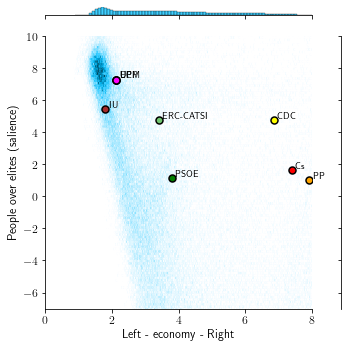

In [42]:
# visualization of two dimensions

xdim = dimensions_to_visualize[0]
ydim = dimensions_to_visualize[1]

color_dim = 'color'

ren = {xdim: 'x', ydim: 'y'}

disp = {}
for _, row in colors_and_location_df.iterrows():
    disp[row['party']] = (float(row['dim_ax']), float(row['dim_ay']))
    
df = followers_df.rename(columns = ren).drop_duplicates(subset = ['x', 'y'])
#df = df[~df.index.duplicated()]

# use the followers + parliamentarians
g = sn.jointplot(x = 'x', y = 'y', data = df, space = 0, color = "deepskyblue", 
                 kind = 'hex', ratio = 10, height = 5, xlim = graph_xlim, ylim = graph_ylim, #) #,
                 joint_kws = dict(gridsize = gridsize)) 

#for _, row in parliamentarians_df.iterrows(): # TODO
#    g.ax_joint.plot(row[xdim] , row[ydim], '+', color = row[color_dim], mew = 1.0, ms = 7)

for _, row in group_dimensions_df.iterrows():
    g.ax_joint.plot(row[xdim], row[ydim], 'o', color = row[color_dim], mew = 1.5, ms = 7, mec = 'k')
    
    txt = g.ax_joint.text(row[xdim] + disp[row['party']][0],
                          row[ydim] + disp[row['party']][1], row.party, 
                          color = 'black', fontsize = 9)
                          #bbox = dict(boxstyle = "round", ec = 'black', fc = row[color_dim], alpha = 1),
                          
g.ax_joint.set_xlabel(dimension_names_to_visualize[0])
g.ax_joint.set_ylabel(dimension_names_to_visualize[1])

#txt = g.ax_joint.text(graph_text_x, graph_text_y, country, fontsize = 14)
#plt.legend(handles = ideo_legend_small, loc = legend_loc, fontsize = bidimensional_legend_fs)

plt.tight_layout()

plt.show()

#plt.savefig('Figures/AttitudinalSpace/ARF_lrgen_enviroment_bio_nucleaire.pdf')
#plt.clf()
#plt.close()